This project is another real-time industrial task. The main goal is to forecast the future sales of different items. This project can help companies to maintain their supply depends on future sales.

Here, we have the interval level data for sales. We can try ARIMA, SARIMA, Holts, and other prediction models to forecast sales for the upcoming months.

In [1]:
#Importing required packages
import pandas as pd 
import numpy as np 
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import xlsxwriter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble,linear_model,neighbors,metrics,tree
import xgboost
import pickle
from datetime import datetime
import pandas_profiling 
pd.set_option('display.max_rows',400)
pd.set_option('display.max_columns',400)

C:\Users\SHREE\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#Importing data:
train = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Walmart sales forecasting\train.csv")
test = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Walmart sales forecasting\test.csv')
stores = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Walmart sales forecasting\stores.csv')
feature=pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Walmart sales forecasting\features.csv')

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
stores.Store.nunique()

45

In [5]:
feature.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [6]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train.Dept.nunique()

81

In [8]:
test.tail(100)

,Store,Dept,Date,IsHoliday
114964,45,95,2013-03-01,False
114965,45,95,2013-03-08,False
114966,45,95,2013-03-15,False
114967,45,95,2013-03-22,False
114968,45,95,2013-03-29,False
114969,45,95,2013-04-05,False
114970,45,95,2013-04-12,False
114971,45,95,2013-04-19,False
114972,45,95,2013-04-26,False
114973,45,95,2013-05-03,False


In [9]:
test.Dept.nunique()

81

In [10]:
# For Output_excel file...
writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')

In [11]:
train_bt = pd.merge(train,stores) 
train = pd.merge(train_bt,feature)
#
test_bt = pd.merge(test,stores)
test= pd.merge(test_bt,feature)

In [12]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [13]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [14]:
print(train.info())
print("---------------------------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None
-------------------

### 1. Training Data

In [15]:
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]
print(numeric_var_train)
print(cat_var_train)

['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [16]:
# Creating Data audit Report
# Use a general function that returns multiple values    
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
 
num_summary=train_num.apply(lambda x: var_summary(x)).T
num_summary.to_excel(writer,'Numeric_variable Summary',index=True)
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,421570.0,0.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,-4988.940,5.000000,59.974500,291.097000,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [17]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,421570,421570
NMISS,0,0
ColumnsNames,2011-12-23 3027 2011-11-25 3021 2011-12-...,A 215478 B 163495 C 42597 Name: Type...


### 2. Testing Data

In [18]:
numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]
print(numeric_var_test)
print(cat_var_test)

['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


In [20]:
num_summary=test_num.apply(lambda x: var_summary(x)).T
num_summary.to_excel(writer,'Numeric_variable Summary',index=True)
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,115064.0,0.0,2.558817e+06,22.238207,22.000,12.809930,1.640943e+02,1.000,1.000,3.000,5.000,11.000,22.000,33.000,40.000,43.000,45.000,45.000
Dept,115064.0,0.0,5.101883e+06,44.339524,37.000,30.656410,9.398155e+02,1.000,1.000,4.000,7.000,18.000,37.000,74.000,92.000,95.000,98.000,99.000
Size,115064.0,0.0,1.570597e+10,136497.688921,140167.000,61106.926438,3.734056e+09,34875.000,34875.000,39690.000,39910.000,93638.000,140167.000,202505.000,204184.000,206302.000,219622.000,219622.000
Temperature,115064.0,0.0,6.206760e+06,53.941804,54.470,18.724153,3.505939e+02,-7.290,11.440,23.980,29.970,39.820,54.470,67.350,79.480,83.820,92.140,101.950
Fuel_Price,115064.0,0.0,4.121070e+05,3.581546,3.606,0.239442,5.733244e-02,2.872,2.957,3.161,3.227,3.431,3.606,3.766,3.866,3.951,4.079,4.125


In [21]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=test_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,115064,115064
NMISS,0,0
ColumnsNames,2012-12-21 3002 2012-12-07 2989 2012-12-...,"A 58713 B 44500 C 11851 Name: Type, d..."


In [22]:
Profile_train=pandas_profiling.ProfileReport(train)
Profile_train.to_file('sales_report.html')

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

C:\Users\SHREE\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
Profile_test=pandas_profiling.ProfileReport(test)
Profile_test.to_file('sales_report_test.html')

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
train_corr=pd.DataFrame(train.corr())
train_corr.to_excel(writer,'Train_Data Corr',index=True)
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024004,-0.085195,-0.000548,-0.182881,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552
Dept,0.024004,1.000000,0.148032,0.000916,-0.002966,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,0.243828,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
IsHoliday,-0.000548,0.000916,0.012774,1.000000,0.000593,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Size,-0.182881,-0.002966,0.243828,0.000593,1.000000,-0.058313,0.003361,0.345673,0.108827,0.048913,0.168196,0.304575,-0.003314,-0.068238


In [25]:
test_corr=pd.DataFrame(test.corr())
test_corr.to_excel(writer,'Test_Data Corr',index=True)
test_corr.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.019627,-0.001166,-0.186845,-0.043495,0.153425,-0.091707,-0.041370,-0.025177,0.010331,0.010419,-0.214872,0.250321
Dept,0.019627,1.000000,0.001249,0.001502,0.003970,0.000554,-0.002353,0.001292,0.000247,0.002510,0.000776,-0.006336,0.004087
IsHoliday,-0.001166,0.001249,1.000000,-0.000443,-0.187428,-0.126443,0.355257,0.265402,0.496062,0.289700,-0.019386,-0.001475,0.010288
Size,-0.186845,0.001502,-0.000443,1.000000,-0.061256,0.055088,0.309614,0.157526,0.050088,0.155448,0.103681,-0.002916,-0.001988
Temperature,-0.043495,0.003970,-0.187428,-0.061256,1.000000,0.073938,-0.168899,-0.324280,-0.049771,-0.059583,0.003937,0.280861,0.022136


<AxesSubplot:>

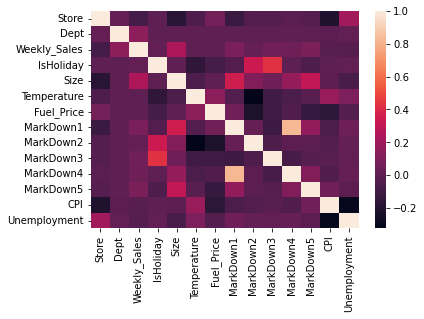

In [26]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(train.corr())

<AxesSubplot:>

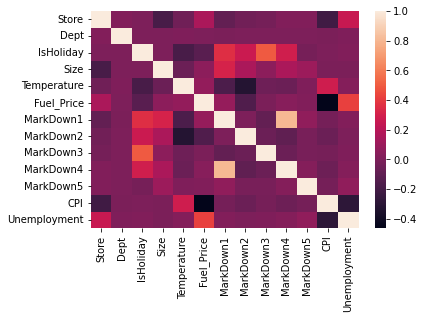

In [27]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(test.corr())

### Data Exploratory Analysis

<AxesSubplot:>

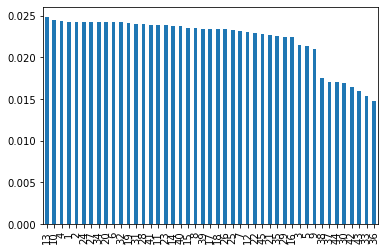

In [28]:
train['Store'].value_counts(normalize=True).plot(kind = 'bar',fig=(4,5))

In [29]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


<AxesSubplot:>

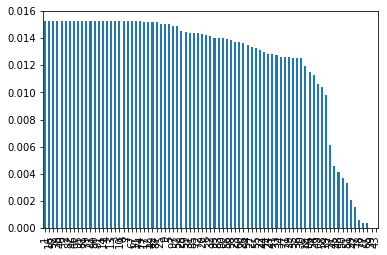

In [30]:
train.Dept.value_counts(normalize=True).plot(kind = 'bar',fig=(4,5))

C:\Users\SHREE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

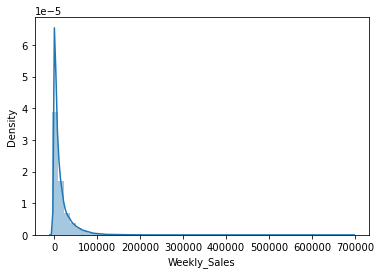

In [31]:
sns.distplot(train.Weekly_Sales)

### Store Size vs Sales

<AxesSubplot:xlabel='Weekly_Sales'>

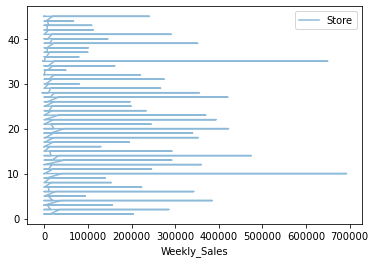

In [32]:
train.plot(kind='line', x='Weekly_Sales', y='Store', alpha=0.5)

### Sales vs Type

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Type'>

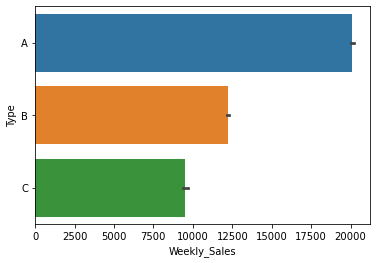

In [33]:
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])

### Sales vs Deptartment

<AxesSubplot:xlabel='Dept'>

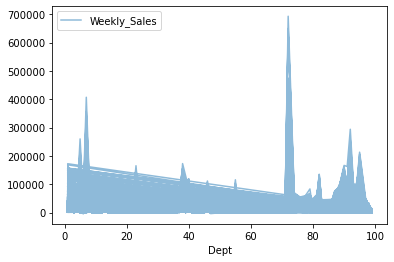

In [35]:
train.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=0.5,fig=(4,5))

### Missing values treatment

In [36]:
print(train.isnull().sum())
print("_"*30)
print(test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64
______________________________
Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64


In [37]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [38]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.median()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.median()))

In [39]:
train=train.fillna(0)
test=test.fillna(0)

In [40]:
print(train.isnull().sum())
print("_"*30)
print(test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
______________________________
Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     421570 non-null  float64
 10  MarkDown2     421570 non-null  float64
 11  MarkDown3     421570 non-null  float64
 12  MarkDown4     421570 non-null  float64
 13  MarkDown5     421570 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


### Outlier Treatment

In [42]:
# we can find outliers in sales
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000,train.Weekly_Sales)

<AxesSubplot:ylabel='Frequency'>

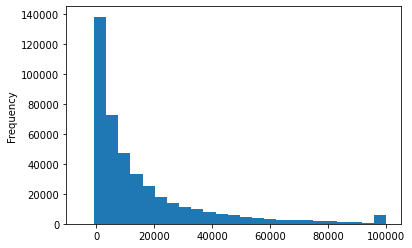

In [43]:
train.Weekly_Sales.plot.hist(bins=25)

### Feature Extraction

In [44]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [46]:
# Extract date features
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day

In [47]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,4,2,2010,5


In [48]:
train_test_data = [train, test]

In [49]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

In [50]:
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

In [51]:
# Now for festivals
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 5, 1)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)
#........................................................................
test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

In [52]:
# Altering the isHoliday value depending on these new holidays...
train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']
test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [53]:
print(train.Christmas.value_counts())
print(train.Super_Bowl.value_counts())
print(train.Thanksgiving.value_counts())
print(train.Labour_Day.value_counts())

0    415624
1      5946
Name: Christmas, dtype: int64
0    412675
1      8895
Name: Super_Bowl, dtype: int64
0    415611
1      5959
Name: Thanksgiving, dtype: int64
0    415646
1      5924
Name: Labour_Day, dtype: int64


In [54]:
# Since we have Imputed IsHoliday according to Extra holidays..These extra holiday variable has redundant..
# Droping the Extra holiday variables because its redundant..
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
train.drop(dp,axis=1,inplace=True)
test.drop(dp,axis=1,inplace=True)

### Feature Selection

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   Date            421570 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       421570 non-null  int64         
 5   Type            421570 non-null  int64         
 6   Size            421570 non-null  int64         
 7   Temperature     421570 non-null  float64       
 8   Fuel_Price      421570 non-null  float64       
 9   MarkDown1       421570 non-null  float64       
 10  MarkDown2       421570 non-null  float64       
 11  MarkDown3       421570 non-null  float64       
 12  MarkDown4       421570 non-null  float64       
 13  MarkDown5       421570 non-null  float64       
 14  CPI             421570 non-null  flo

In [56]:
# MarkDown5 highly skewed hence removing, also removing "CPI" and "Unemployment"
features_drop=['Unemployment','CPI','MarkDown5']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5
1,1,2,2010-02-05,50605.27,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,4,2,2010,5


In [57]:
test.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
0,1,1,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2
1,1,2,2012-11-02,0,1,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,4,11,2012,2


### Define training and testing set

In [58]:
train_X=train.drop(['Weekly_Sales','Date'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop('Date',axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 15), (421570,), (115064, 15))

<AxesSubplot:>

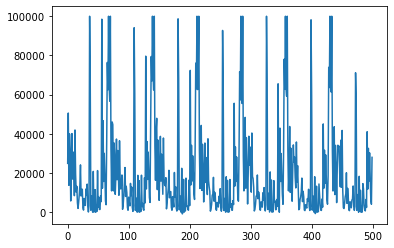

In [59]:
train_y[:500].plot()

In [60]:
train_y

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

As sales is not a continous increasing or decreasing number, I have treated it as regression with adding some extra festivals and vacations that affects sales otherwise, if we will think as a mall sales, sales is not a time series but a occasional

### 1.Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [62]:
clf = LinearRegression()
clf.fit(train_X, train_y)
y_pred_linear=clf.predict(test_X)
acc_linear=round( clf.score(train_X, train_y) * 100, 2)
print ('score:'+str(acc_linear) + ' percent')

score:8.86 percent


### 2. Random Forest

In [63]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



### 3. Decision Tree

In [64]:
clf=DecisionTreeRegressor()
clf.fit(train_X, train_y)
y_pred_dt= clf.predict(test_X)
acc_dt = round( clf.score(train_X, train_y) * 100, 2)
print (str(acc_dt) + ' percent')

100.0 percent


### 4. XGBoost

In [65]:
clf=XGBRegressor()
clf.fit(train_X, train_y)
y_pred_dt= clf.predict(test_X)
acc_XGB = round( clf.score(train_X, train_y) * 100, 2)
print (str(acc_XGB) + ' percent')

C:\Users\SHREE\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


94.89 percent


### Comparing Models
Let's compare the accuracy score of all the regression models used above.

In [66]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree', "XGBoost"],
    
    'Score': [acc_linear, acc_rf,acc_dt, acc_XGB]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.00
1,Random Forest,99.77
3,XGBoost,94.89
0,Linear Regression,8.86


### Predicting Sales value for test data based on highest score model.

In [67]:
# Prediction value using Random Forest model..
submission = pd.DataFrame({
        "Date": test.Date.astype(str),
        "Store": test.Store.astype(str),
        "Dept": test.Dept.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission.to_csv('weekly_sales predicted1.csv', index=False)
#submission.to_excel(writer,'Weekly_sales Pred',index=False)

In [68]:
submission.head()

,Date,Store,Dept,Weekly_Sales
0,2012-11-02,1,1,35733.7321
1,2012-11-02,1,2,47570.9013
2,2012-11-02,1,3,10664.6779
3,2012-11-02,1,4,38120.4994
4,2012-11-02,1,5,31335.3799


### Decision tree is winner here!!